# Continuação Keras 1

## Exploraremos os hiper parâmetros do algoritimo

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

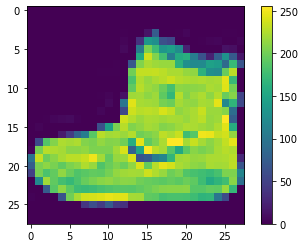

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5266 - accuracy: 0.8132 - val_loss: 0.4325 - val_accuracy: 0.8428
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3983 - accuracy: 0.8544 - val_loss: 0.3623 - val_accuracy: 0.8682
Epoch 3/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.3643 - accuracy: 0.8667 - val_loss: 0.3482 - val_accuracy: 0.8733
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3404 - accuracy: 0.8741 - val_loss: 0.3497 - val_accuracy: 0.8727
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3228 - accuracy: 0.8814 - val_loss: 0.3299 - val_accuracy: 0.8810


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
# por debaixo dos panos temos um array multiplicando outro, ou seja, multiplicação de matrizes
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.07452379, -0.06576952,  0.02420964, ...,  0.06777423,
         0.06819363, -0.0231841 ],
       [ 0.02291587,  0.04770913,  0.14973454, ...,  0.18217783,
         0.01565862,  0.08282227],
       [-0.03402076,  0.04241587,  0.09493557, ...,  0.25447422,
         0.01211288,  0.11930279],
       ...,
       [-0.0653988 , -0.03048183,  0.16199312, ...,  0.03708144,
        -0.00854075, -0.03776873],
       [-0.03779593, -0.13253331,  0.01553244, ...,  0.12863365,
        -0.00804693,  0.05732314],
       [-0.07907516, -0.11982332,  0.01145277, ...,  0.17588149,
         0.04211837,  0.10092752]], dtype=float32)

In [15]:
# criando array com valores zerados e aleatórios
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_pesos_camada_dense])
'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_pesos_camada_dense])

modelo.layers[1].get_weights()


[array([[0.9836154 , 0.65181   , 0.06642079, ..., 0.8982686 , 0.13171138,
         0.29097348],
        [0.35296297, 0.08956034, 0.5682562 , ..., 0.34007093, 0.31675604,
         0.07631841],
        [0.00229077, 0.27265513, 0.14806019, ..., 0.38028136, 0.39306074,
         0.9949338 ],
        ...,
        [0.6493045 , 0.9459595 , 0.9370223 , ..., 0.3629321 , 0.8000862 ,
         0.51011103],
        [0.29595813, 0.09413946, 0.00151477, ..., 0.5082125 , 0.19343416,
         0.72696596],
        [0.17480505, 0.00126024, 0.959987  , ..., 0.65091026, 0.21271037,
         0.8695769 ]], dtype=float32),
 array([ 0.261701  ,  0.17422436,  0.30732656,  0.06548955,  0.2772519 ,
         0.265594  ,  0.06166536, -0.02656111,  0.12739901, -0.1047264 ,
        -0.2375601 , -0.04335317, -0.01902843,  0.180194  , -0.00952959,
         0.21551152, -0.02495442,  0.13410571,  0.05383703, -0.32468295,
         0.12590757,  0.15718386, -0.17906642,  0.01132514,  0.12620807,
        -0.16357464,  0.26998

In [22]:
#rodando o modelo com o array de pesos zerados
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 15s 9ms/step - loss: 2.3085 - accuracy: 0.0984 - val_loss: 2.3031 - val_accuracy: 0.1003
Epoch 2/5
1500/1500 [==============================] - 17s 11ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 17s 11ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 17s 12ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 20s 13ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0957


In [13]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

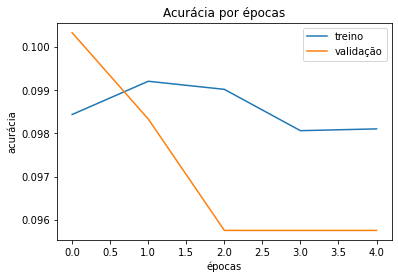

In [23]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

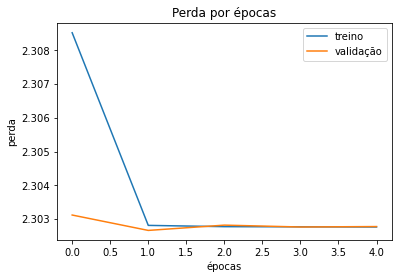

In [24]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [10]:
vieses_pesos_camada_dense = modelo.layers[1].get_weights()[1]
vieses_pesos_camada_dense

array([ 0.261701  ,  0.17422436,  0.30732656,  0.06548955,  0.2772519 ,
        0.265594  ,  0.06166536, -0.02656111,  0.12739901, -0.1047264 ,
       -0.2375601 , -0.04335317, -0.01902843,  0.180194  , -0.00952959,
        0.21551152, -0.02495442,  0.13410571,  0.05383703, -0.32468295,
        0.12590757,  0.15718386, -0.17906642,  0.01132514,  0.12620807,
       -0.16357464,  0.269982  ,  0.19788478, -0.01392005,  0.30717218,
       -0.01827676,  0.07643138, -0.01095732,  0.28051418,  0.19994767,
        0.2832226 ,  0.22770542, -0.04032278, -0.300108  ,  0.1970892 ,
       -0.11770348, -0.01077373,  0.1811147 ,  0.166331  ,  0.19877732,
        0.05804132,  0.42162648,  0.21127225,  0.1663029 , -0.11029958,
        0.32821333,  0.27073193, -0.23746929,  0.40485886,  0.16335134,
        0.2347813 ,  0.2657973 ,  0.01635626,  0.1798703 , -0.00433464,
        0.31101337,  0.16669942,  0.23393825,  0.05823117,  0.12347389,
       -0.01143145, -0.12151266,  0.15880209,  0.08304301,  0.02

In [21]:
#zerando as informações, criando variável com dados "0"
vieses_pesos_camada_dense_zerados = np.zeros((256))
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_pesos_camada_dense_zerados])

Salvando e carregando o modelo treinado

In [17]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

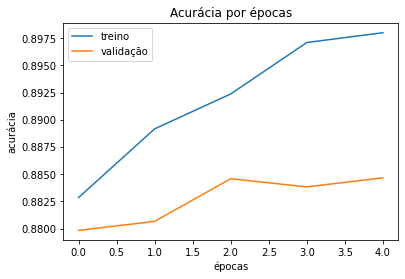

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [19]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 2s 5ms/step
resultado teste: 5
número da imagem de teste: 2
313/313 [==============================] - 2s 5ms/step
resultado teste modelo salvo: 5
número da imagem de teste: 2


Avaliando o modelo

In [20]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 2s 7ms/step - loss: 403192.4062 - accuracy: 0.1000
Perda do teste: 403192.40625
Acurácia do teste: 0.10000000149011612
